<a href="https://colab.research.google.com/github/ikitova/MLatImperial2022/blob/main/lab_01_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic: Machine Learning from Disaster

This notebook's gonna teach you to use the basic data science stack for python: jupyter, numpy, pandas, matplotlib and sklearn. We will try to use these tools to analyze the data from the infamous Titanic shipwreck.

!["Untergang der Titanic", as conceived by Willy Stöwer, 1912](https://upload.wikimedia.org/wikipedia/commons/6/6e/St%C3%B6wer_Titanic.jpg)

## Part I: Jupyter notebooks recap

This whole document you are looking at right now is a **jupyter notebook**. You can think of jupyter as of a browser-friendly python development environment.

For each notebook there's a python interpreter running behind the scenes, also called a **kernel**. The notebook consists of **cells** - either *code* cells, or *text* cells. E.g. this text you're reading is in a text cell.

An example of a code cell can be found below. You can execute its code by placing the coursor in it and hitting `Shift + Enter`.

__please keep running all the code cells as you read__

In [ ]:
print('Hello world')

Hello world


Note that same python session is used to run the code from different cells. So, for example, by defining a variable in one cell, you can re-use it in another:

In [ ]:
some_number = 42

In [ ]:
some_number**2

1764

Jupyter allows you to run cells in an arbitrary order, which may make your code a bit messy and complicated to debug. In general it's a good practice to write your code such that it successfully runs from top to bottom in a clean environment. To reset your environment back to a clean state click `Runtime -> Restart runtime` (in regular jupyter: `Kernel -> Restart`).

**The most important feature** of jupyter notebooks for this course: 
* contextual help: In colab the suggestions / documentation will appear automatically as you type.

In [10]:
# run this first
import math

In [14]:
# Place your cursor at the end of the unfinished line below and 
# type in '.' to see the contextual help and
# find a function that computes arctangent from two parameters (should
# have 2 in it's name).
# Once you chose it, put an opening bracket character to
# see the docs.

math.  # <--- type in a '.' symbol to see suggestions

0.7853981633974483

## Part II: Numpy and vectorized computing

Almost any machine learning model requires some computationally heavy lifting usually involving linear algebra problems. Unfortunately, raw python is terrible at this because each operation is interpreted at runtime. 

So instead, we'll use `numpy` - a library that lets you run blazing fast computation with vectors, matrices and other tensors. It's written in lower-level programming languages like C or Fortran and only uses python as an interface.

Quoting [documentation](https://numpy.org/devdocs/user/quickstart.html):
> NumPy’s main object is the homogeneous multidimensional array. It is a table of elements (usually numbers), all of the same type, indexed by a tuple of non-negative integers. In NumPy dimensions are called axes.




This object is called `numpy.ndarray` ("nd" standing for "N-dimensional"). It is also aliased to `numpy.array`:

In [ ]:
import numpy as np

a = np.array([1,2,3,4,5])
b = np.array([5,4,3,2,1])
print("a = ", a)
print("b = ", b)

# math and boolean operations can be applied to each element of an array
print("a + 1 =", a + 1)
print("a * 2 =", a * 2)
print("a == 2", a == 2)
# ... or corresponding elements of two (or more) arrays
print("a + b =", a + b)
print("a * b =", a * b)

a =  [1 2 3 4 5]
b =  [5 4 3 2 1]
a + 1 = [2 3 4 5 6]
a * 2 = [ 2  4  6  8 10]
a == 2 [False  True False False False]
a + b = [6 6 6 6 6]
a * b = [5 8 9 8 5]


In [ ]:
# Your turn: compute half-products of a and b elements (halves of products)
<YOUR CODE>

SyntaxError: invalid syntax (<ipython-input-7-1bbccaf6b34c>, line 2)

In [ ]:
# compute elementwise quotient between squared a and (b plus 1)
<YOUR CODE>

```

```

```

```

```

```

```

```

```

```

There's a number of functions to create arrays of zeros, ones, ascending/descending numbers etc.:

In [ ]:
np.zeros(shape=(3, 4))

In [ ]:
np.ones(shape=(2, 5), dtype=np.bool)

In [ ]:
np.arange(3, 15, 2) # start, stop, step

In [ ]:
np.linspace(0, 10, 11) # divide [0, 10] interval into 11 points

In [ ]:
np.logspace(1, 10, 10, base=2, dtype=np.int64)

You can easily reshape arrays:

In [ ]:
np.arange(24).reshape(2, 3, 4)

or add dimensions of size 1:

In [ ]:
print(np.arange(3)[:, np.newaxis])
print('---')
print(np.arange(3)[np.newaxis, :])

#### Or similarly:

# print(np.arange(3)[:, None])
# print('---')
# print(np.arange(3)[None, :])

Such dimensions are automatically broadcast when doing mathematical operations:

In [ ]:
print(np.arange(3)[:, np.newaxis] + np.zeros(shape=(3, 3), dtype=int))
print()
print(np.arange(3)[np.newaxis, :] + np.zeros(shape=(3, 3), dtype=int))

There is also a number of ways to stack arrays together:

In [ ]:
matrix1 = np.arange(50).reshape(10, 5)
matrix2 = -np.arange(20).reshape(10, 2)

np.concatenate([matrix1, matrix2], axis=1)

In [ ]:
A = matrix1[:,0]
B = matrix2[:,0]

print(A)
print('---')
print(B)
print('---')
print(np.stack([A, B], axis=1))



In [ ]:
b=np.tile(np.identity(2),(5,2))
b

Any matrix can be transposed easily:

In [ ]:
print(matrix2)
print('---')
print(matrix2.T)

In [ ]:
print('matrix2.shape =', matrix2.shape)
print('matrix2.T.shape =', matrix2.T.shape)

In [ ]:
# Your turn: make a (7 x 5) matrix with e_ij = i
# (i - row number, j - column number)
#
# Avoid using loops.

<YOUR CODE>

### How fast is it?

Let's compare computation time for python and numpy
* Two arrays of 10^6 elements
 * first - from 0 to 1 000 000
 * second - from 99 to 1 000 099
 
* Computing:
 * elemwise sum
 * elemwise product
 * square root of first array
 * sum of all elements in the first array
 

In [ ]:
%%time 
# ^-- this "magic" measures and prints cell computation time

# Option I: pure python
arr_1 = range(1000000)
arr_2 = range(99,1000099)


a_sum = []
a_prod = []
sqrt_a1 = []
for i in range(len(arr_1)):
    a_sum.append(arr_1[i]+arr_2[i])
    a_prod.append(arr_1[i]*arr_2[i])
    a_sum.append(arr_1[i]**0.5)
    
arr_1_sum = sum(arr_1)


In [ ]:
%%time

# Option II: start from python, convert to numpy
arr_1 = range(1000000)
arr_2 = range(99,1000099)

arr_1, arr_2 = np.array(arr_1) , np.array(arr_2)


a_sum = arr_1 + arr_2
a_prod = arr_1 * arr_2
sqrt_a1 = arr_1 ** .5
arr_1_sum = arr_1.sum()


In [ ]:
%%time

# Option III: pure numpy
arr_1 = np.arange(1000000)
arr_2 = np.arange(99,1000099)

a_sum = arr_1 + arr_2
a_prod = arr_1 * arr_2
sqrt_a1 = arr_1 ** .5
arr_1_sum = arr_1.sum()


If you want more serious benchmarks, take a look at [this](http://brilliantlywrong.blogspot.ru/2015/01/benchmarks-of-speed-numpy-vs-all.html).

```

```

```

```

```

```

```

```

```

```

```

```

```

```

### Other numpy functions and features

There's also a bunch of pre-implemented operations including logarithms, trigonometry, vector/matrix products and aggregations.

In [ ]:
a = np.array([1,2,3,4,5])
b = np.array([5,4,3,2,1])
print("numpy.sum(a) = ", np.sum(a))
print("numpy.mean(a) = ", np.mean(a))
print("numpy.min(a) = ",  np.min(a))
print("numpy.argmin(b) = ", np.argmin(b))  # index of minimal element
print("numpy.dot(a,b) = ", np.dot(a, b))      # dot product. Also used for matrix/tensor multiplication
print("numpy.unique(['male','male','female','female','male']) = ", np.unique(['male','male','female','female','male']))

# and tons of other stuff. see http://bit.ly/2u5q430 .

In [ ]:
# most of this functions are also implemented as members of numpy arrays, e.g.:
print('a.min() =', a.min())
print('a.mean() =', a.mean())

In [ ]:
print("Boolean operations")

print('a = ', a)
print('b = ', b)
print("a > 2", a > 2)
print("numpy.logical_not(a>2) = ", np.logical_not(a>2))
print("numpy.logical_and(a>2,b>2) = ", np.logical_and(a > 2,b > 2))
print("numpy.logical_or(a>2,b<3) = ", np.logical_or(a > 2, b < 3))

print("\n shortcuts")
print("~(a > 2) = ", ~(a > 2))                    #logical_not(a > 2)
print("(a > 2) & (b > 2) = ", (a > 2) & (b > 2))  #logical_and
print("(a > 2) | (b < 3) = ", (a > 2) | (b < 3))  #logical_or

Another numpy feature we'll need is indexing: selecting elements from an array. 
Aside from python indexes and slices (e.g. a[1:4]), numpy also allows you to select several elements at once.

In [ ]:
a = np.arange(24).reshape(4, 6)
print(a)
print('---')
print(a[1:3,0:6:2])

In [ ]:
a = np.array([0, 1, 4, 9, 16, 25])
ix = np.array([1,2,5])
print("a = ", a)
print("Select by element index")
print("a[[1,2,5]] = ", a[ix])

print("\nSelect by boolean mask")
print("a[a > 5] = ", a[a > 5])     # select all elements in a that are greater than 5
print("(a % 2 == 0) =", a % 2 == 0) # True for even, False for odd
print("a[a % 2 == 0] =", a[a % 2 == 0]) # select all elements in a that are even

## Part III: Loading data with Pandas

Pandas is a library that helps you load the data, prepare it and perform some lightweight analysis. The god object here is the `pandas.DataFrame` - a 2d table with batteries included (it actually runs numpy under the hood).

In the cell below we use it to read the data on the infamous titanic shipwreck.

In [4]:
!wget https://raw.githubusercontent.com/ikitova/MLatImperial2022/main/train.csv

--2022-01-23 15:26:04--  https://raw.githubusercontent.com/ikitova/MLatImperial2022/main/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60302 (59K) [text/plain]
Saving to: ‘train.csv’

train.csv           100%[===================>]  58.89K  --.-KB/s    in 0.01s   

2022-01-23 15:26:04 (5.66 MB/s) - ‘train.csv’ saved [60302/60302]



In [7]:
import pandas as pd
data = pd.read_csv("train.csv", index_col='PassengerId') # this yields a pandas.DataFrame

In [8]:
# Take a look at the data

data.head() # selects top 5 lines

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### About the data
Here's some of the columns
* Name - a string with person's full name
* Survived - 1 if a person survived the shipwreck, 0 otherwise.
* Pclass - passenger class. Pclass == 3 is cheap'n'cheerful, Pclass == 1 is for moneybags.
* Sex - a person's gender
* Age - age in years, if available
* Sibsp - number of siblings on a ship
* Parch - number of parents on a ship
* Fare - ticket cost
* Embarked - port where the passenger embarked
 * C = Cherbourg; Q = Queenstown; S = Southampton

In [9]:
# table dimensions
print("len(data) = ", len(data))
print("data.shape = ", data.shape)

len(data) =  891
data.shape =  (891, 11)


In [ ]:
# select a single row
print(data.loc[4])

In [ ]:
# select a single column.
ages = data["Age"] # alternatively: data.Age
print(ages.loc[:10])

In [ ]:
# select several columns and rows at once
data.loc[5:10, ("Fare", "Pclass")]    # alternatively: data[["Fare","Pclass"]].loc[5:10]

### `loc` vs `iloc`

There are two ways of indexing the rows in pandas:
 *   by index column values (`PassengerId` in our case) – use `data.loc` for that
 *   by positional index - use `data.iloc` for that

Note that index column starts from 1, so positional index 0 will correspond to index column value 1, positional 1 to index column value 2, and so on:

In [ ]:
print(data.index)
print('------')
print("data.iloc[0]:")
print(data.iloc[0])
print('------')
print("data.loc[1]:")
print(data.loc[1])

Also note that when indexing with `.loc` both slice ends are included:

In [ ]:
data.loc[2:3]

while with `.iloc` the end is excluded:

In [ ]:
data.iloc[1:2]

More complicated indexing (similar to boolean indexing in numpy):

In [ ]:
print("data[(data['Age'] < 18) & (data['Sex'] == 'male')] = (below)") # select male children
data.loc[(data['Age'] < 18) & (data['Sex'] == 'male')]

### Your turn:


In [ ]:
# select passengers number 13 and 666 - did they survive?

<YOUR CODE>

In [ ]:
# compute the overall survival rate (what fraction of passengers survived the shipwreck)

<YOUR CODE>

```

```

```

```

```

```

```

```

```

```

```

```

```

```



Pandas also has some basic data analysis tools. For one, you can quickly display statistical aggregates for each column using `.describe()`

In [ ]:
data.describe()

Some columns contain __NaN__ values - this means that there is no data there. For example, passenger `#5` has unknown age. To simplify the future data analysis, we'll replace NaN values by using pandas `fillna` function.

_Note: we do this so easily because it's a tutorial. In general, you think twice before you modify data like this._

In [ ]:
data.iloc[5]

In [ ]:
data['Age'] = data['Age'].fillna(value=data['Age'].mean())
data['Fare'] = data['Fare'].fillna(value=data['Fare'].mean())

In [ ]:
data.iloc[5]

### Pandas + numpy

The important part: as pandas uses numpy under the hood, most of numpy functionality works with dataframes, as you can get their numpy representation with `.to_numpy()` (most numpy functions will even work on pure pandas objects):

In [ ]:
# calling np.max on a pure pandas column:
print("Max ticket price: ", np.max(data["Fare"]))

# calling np.argmax on a numpy representation of a pandas column
# to get its positional index:
print("\nThe guy who paid the most:\n",
      data.iloc[
          np.argmax(data["Fare"].to_numpy())
      ])

In [ ]:
# numpy works only with positional index:
print(data['Fare'].to_numpy().argmax())
#     ^^^^^^^^^^^^^^^^^^^
#     this part returns a numpy array, argmax of which we are calculating


# in pandas, you can ask for the index (i.e. value of the index column)
# of the maximal element like this:
print(data["Fare"].idxmax())

### Your turn

Use numpy and pandas to answer a few questions about data

In [ ]:
# your code: compute the mean age and find the oldest
# person on the ship
<YOUR CODE>

In [ ]:
# who on average paid more for their ticket, men or women?

mean_fare_men = <YOUR CODE>
mean_fare_women = <YOUR CODE>

print(mean_fare_men, mean_fare_women)

In [ ]:
# who is more likely to survive: a child (<18 yo) or an adult?

child_survival_rate = <YOUR CODE>
adult_survival_rate = <YOUR CODE>

print(child_survival_rate, adult_survival_rate)

### Pandas: adding new columns

To define a new column in a dataframe simply assign to it (if such a column exists it will get overwritten):

In [ ]:
data['CabinUnknown'] = data.Cabin.isna()
data.head()

Be sure to use the approach with a `['ColumnName']` , rather than `.ColumnName`, otherwize it won't work:

In [ ]:
data.this_will_not_work = data.Age**2
data.head()

More pandas: 
* Official [tutorials](https://pandas.pydata.org/pandas-docs/stable/tutorials.html), including this [10 minutes to pandas](https://pandas.pydata.org/pandas-docs/stable/10min.html#min)
* Bunch of cheat sheets awaits just one google query away from you (e.g. [basics](http://datacamp-community-prod.s3.amazonaws.com/dbed353d-2757-4617-8206-8767ab379ab3), [combining datasets](https://pbs.twimg.com/media/C65MaMpVwAA3v0A.jpg) and so on). 

## Part V (final): machine learning with scikit-learn

Scikit-learn is _the_ tool for simple machine learning pipelines. 

It's a single library that unites a whole bunch of models under the common interface:
* Create:__ `model = sklearn.whatever.ModelNameHere(parameters_if_any)`__
* Train:__ `model.fit(X,y)`__
* Predict:__ `model.predict(X_test)`__

It also contains utilities for feature extraction, quality estimation or cross-validation.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
# Let's reload the data to undo our modifications:
data = pd.read_csv("train.csv", index_col='PassengerId')

features = data[["Fare", "SibSp"]].copy()

answers = data["Survived"]

model = KNeighborsClassifier(n_neighbors=10)
model.fit(features[:-100], answers[:-100])

test_predictions = model.predict(features[-100:])
print("Test accuracy:", accuracy_score(answers[-100:], test_predictions))

Test accuracy: 0.75


### Spliting dataset into training set and test set

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, answers, test_size = 0.2, random_state = 0)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(features,answers,test_size=50,shuffle=True)

model = KNeighborsClassifier(n_neighbors=10)
model.fit(features_train, answers_train)

test_predictions = model.predict(features_val)
print("Test accuracy:", accuracy_score(answers_val, test_predictions))

Test accuracy: 0.78


* Sklearn [tutorials](http://scikit-learn.org/stable/tutorial/index.html)
* Sklearn [examples](http://scikit-learn.org/stable/auto_examples/index.html)
* Sklearn [cheat sheet](http://scikit-learn.org/stable/_static/ml_map.png)

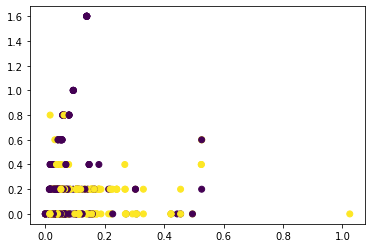

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X_train.Fare,X_train.SibSp,c=y_train)

### Feature Scaling
- StandardScaler()
- MinMaxScaler()
- RobustScaler()


https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

##### methods of StandardScaler:
- fit(X) -Compute the mean and std to be used for later scaling.

- fit_transform(X) - Fit to data, then transform it.

- transform(X) -Perform standardization by centering and scaling.

In many ML problems feature scaling plays significant role. 

In [ ]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler

features = data[["Fare", "SibSp","Age"]].copy()
answers = data["Survived"]
X_train,X_test,y_train,y_test=train_test_split(features,answers,test_size=0.1,shuffle=True,random_state=0)
mean_age=X_train.Age.mean()
X_train["Age"].fillna(value=mean_age,inplace=True)
X_test["Age"].fillna(value=mean_age,inplace=True)
scaler=MinMaxScaler()
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
knnmodel=KNeighborsClassifier(n_neighbors=15)


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [ ]:
knnmodel.fit(X_train_scaled,y_train)

X_test_scaled=scaler.transform(X_test)


In [ ]:
test_predictions = knnmodel.predict(X_test_scaled)
print("Test accuracy:", accuracy_score(y_test, test_predictions))


Test accuracy: 0.7555555555555555


In [ ]:
<YOUR TURN>
# change scaler in previous cell to another  (MinMaxScaler, RobustScaler or other)
# does it give improvement in accuracy_score?

SyntaxError: invalid syntax (<ipython-input-288-042a63ebb27a>, line 1)

0| 3| 5| 8| 10| 13| 15| 18| 21| 23| 26| 28| 31| 33| 36| 38| 41| 44| 46| 49| 51| 54| 56| 59| 62| 64| 67| 69| 72| 74| 77| 79| 82| 85| 87| 90| 92| 95| 97| 100.0| 
Min error_rate = 0.2444 for n_neighbors=6


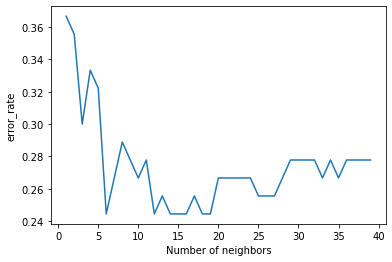

In [ ]:

from utility import show_param_dependency
#model = KNeighborsClassifier(metric='cosine')
model = KNeighborsClassifier(p=2)
show_param_dependency(model, X_train_scaled, y_train, X_test_scaled ,y_test, param_name='n_neighbors', 
                           loss_fun='error_rate', param_vals=np.arange(1,40,1), x_label='Number of neighbors')

0| 11| 22| 33| 44| 56| 67| 78| 89| 100.0| 
Min error_rate = 0.2444 for p=2


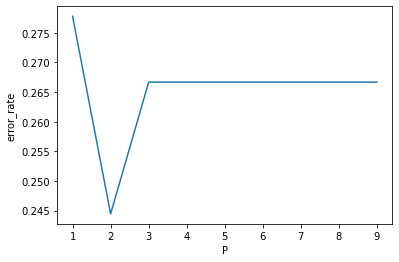

In [ ]:
model = KNeighborsClassifier(n_neighbors=6)
show_param_dependency(model, X_train_scaled, y_train, X_test_scaled ,y_test, param_name='p', 
                           loss_fun='error_rate', param_vals=np.arange(1,10,1), x_label='P')

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors':[1,3,5,8,10,15,20], 'p':[1,2,4,6]}
grid_knn = GridSearchCV(model, param_grid, n_jobs=-1, refit=True)
grid_knn.fit(X_train_scaled,y_train)
print(grid_knn.best_score_, grid_knn.best_params_)


0.714083850931677 {'n_neighbors': 20, 'p': 2}


In [ ]:
print("Test accuracy:", accuracy_score(y_test, grid_knn.best_estimator_.predict(X_test_scaled)))

Test accuracy: 0.7333333333333333


## Bonus part

### Pandas: one-hot encoding

In [ ]:
pd.get_dummies(data.Embarked, prefix='Embarked').head()
# added .head() for a more compact output

### Pandas: merging tables

In [ ]:
data_extended = pd.concat([
                      data,
                      pd.get_dummies(data.Embarked, prefix='Embarked')
                    ], axis=1)
data_extended.head()

### Pandas: groupby

This function provides a neat way to calculate some statistics for groups of entries with some common feature value.

In [ ]:
g = data.groupby('Embarked')
# Now `g` is an iterable of dataframes split based on the values
# in the 'Embarked' column:

for embarked, group in g:
    print(embarked, type(group), group.shape)

In [ ]:
# You can calculate things on the groups simultaniously:

g.mean()

In [ ]:
g.count() # this calculates the number of valid entries (excluding nans)

In [ ]:
# You can also access individual columns:
g.Fare.max()

### Pandas: cut and qcut

These functions let us split data into bins: `cut` makes linear splits, while `qcut` makes quantile-based splits. They both return a column of bins to which current entry belongs:

In [ ]:
pd.cut(data.Age, 3).head() # '.head()' added for a more compact output

PassengerId
1      (0.34, 26.947]
2    (26.947, 53.473]
3      (0.34, 26.947]
4    (26.947, 53.473]
5    (26.947, 53.473]
Name: Age, dtype: category
Categories (3, interval[float64]): [(0.34, 26.947] < (26.947, 53.473] < (53.473, 80.0]]

In [ ]:
pd.qcut(data.Age, 3).head() # '.head()' added for a more compact output

### Your turn

Use `cut` and `groupby` to calculate survival rate for 3 age categories.

**Hint:** you may want to add the result of `cut` as a new column

In [ ]:
<YOUR CODE HERE>

### Pandas: combining the tricks (survival vs ticket fare)

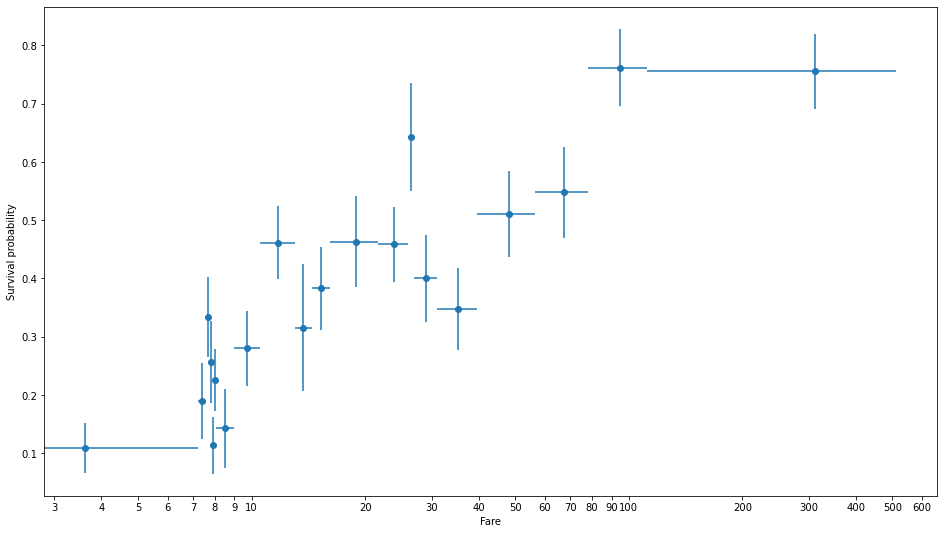

In [ ]:
from matplotlib.ticker import ScalarFormatter

data['qFare'] = pd.qcut(data.Fare, 20)

sur_vs_price = data.groupby('qFare').Survived.mean()
sur_vs_price_e = data.groupby('qFare').Survived.std() \
                        / data.groupby('qFare').Survived.count()**0.5

fig = plt.figure(figsize=(16, 9))
plt.errorbar(x=sur_vs_price.index.categories.mid,
             y=sur_vs_price.values,
             yerr=sur_vs_price_e.values,
             xerr=(
                 sur_vs_price.index.categories.right - 
                 sur_vs_price.index.categories.left
               ) / 2,
             fmt='o')
plt.gca().set_xscale('log')
plt.gca().xaxis.set_major_formatter(ScalarFormatter())
plt.gca().set_xticks(
              list(range(3, 10)) +
              list(range(10, 100, 10)) +
              list(range(100, 700, 100))
            )

plt.xlabel('Fare')
plt.ylabel('Survival probability');

## Bonus part II: plots and matplotlib

Using python to visualize the data is covered by yet another library: `matplotlib`.

Just like python itself, matplotlib has an awesome tendency of keeping simple things simple while still allowing you to write complicated stuff with convenience (e.g. super-detailed plots or custom animations).

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# ^-- this "magic" selects specific matplotlib backend suitable for
# jupyter notebooks. For more info see:
# https://ipython.readthedocs.io/en/stable/interactive/plotting.html#id1
# (actually it's the default in google colab, so not needed here)

# line plot
plt.plot([0,1,2,3,4,5],[0,1,4,9,16,25]);

In [ ]:
#scatter-plot
x = np.arange(5)
print("x =", x)
print("x**2 =", x**2)
print("plotting x**2 vs x:")
plt.scatter(x, x**2)
plt.show()  # show the first plot to begin drawing the next one

plt.plot(x, x**2);

In [ ]:
# draw a scatter plot with custom markers and colors
plt.scatter([1, 1, 2, 3, 4, 4.5], [3, 2, 2, 5, 15, 24],
            c=["red", "blue", "orange", "green", "cyan", "gray"],
            marker="x")

# without plt.show(), several plots will be drawn on top of one another
plt.plot([0, 1, 2, 3, 4, 5], [0, 1, 4, 9, 16, 25], c="black")

# adding more sugar
plt.title("Conspiracy theory proven!!!")
plt.xlabel("Per capita alcohol consumption")
plt.ylabel("# Layers in state of the art image classifier");

# fun with correlations: http://bit.ly/1FcNnWF

In [ ]:
# histogram - showing data density
plt.hist([0,1,1,1,2,2,3,3,3,3,3,4,4,5,5,5,6,7,7,8,9,10])
plt.show()

plt.hist([0,1,1,1,2,2,3,3,3,3,3,4,4,5,5,5,6,7,7,8,9,10], bins=5);

In [ ]:
# you can also specify bin edges instead of just number of bins:

x = np.random.normal(size=10000)
bins = np.linspace(-3, 3, 101)
plt.hist(x, bins=bins);

In [ ]:
# plot a histogram of age and a histogram of ticket fares on separate plots

<YOUR CODE>

#bonus: use context help to see if there is a way to draw a 2D histogram of age vs fare.

In [ ]:
# make a scatter plot of passenger age vs ticket fare

<YOUR CODE>

# kudos if you add separate colors for men and women

* Extended [tutorial](https://matplotlib.org/2.0.2/users/pyplot_tutorial.html)
* Other libraries for more sophisticated stuff: [Seaborn](https://seaborn.pydata.org/), [Plotly](https://plot.ly/python/), and [Bokeh](https://bokeh.pydata.org/en/latest/)